# Intro
Saving your pre trained model will save you a lot of time . So to show how this works I have made this notebook : 


In [ ]:
#import libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
#read train
train = pd.read_csv("../input/ventilator-pressure-prediction/train.csv")

In [ ]:
#since dataset is too big : sampling
train = train.sample(frac =.01,random_state = 90, replace = False)
train.shape

# 1 : Data Analysis 
The most important part

In [ ]:
train.head()

In [ ]:
train.isnull().sum()

In [ ]:
train.info()

In [ ]:
train.corr()

u in and pressure have highest correlation

In [ ]:
sns.scatterplot(x=train["pressure"],y=train['u_in'])

looks like a solid block of blue , Data is spread all around

In [ ]:
sns.histplot( x=train["u_in"],binwidth=5 ,kde=True)

In [ ]:
#dropping breathid for reducing data complication
train = train.drop("breath_id",axis=1)

# 2:Building Model 🌲

In [ ]:
X = train.drop("pressure",axis=1)
y = train["pressure"]

In [ ]:
rf = RandomForestRegressor()
rf.fit(X,y)

# 3:Saving the model in h5 format

In [ ]:
pickle.dump(rf,open("rf.h5","wb"))

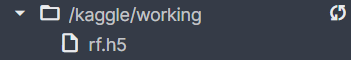

⬆️ it has saved !!

# 4:Loading the model

In [ ]:
rf_loaded = pickle.load(open("rf.h5","rb"))
preds  = rf_loaded.predict(X[:1000])
mae = mean_absolute_error(y[:1000],preds)

In [ ]:
print(mae)

Pretty high score 😅

Thanks for viewing this notebook . Please upvote if you found this useful